In [1]:
%matplotlib inline

import random
import numpy as np
import scipy
import matplotlib.pyplot as plt

Linear regression is an algorithm for predicting values based on another features. It is a supervised learning algorithm - i.e. is fed with samples and it's corresponding labels ("correct values").

# Variables and Constants

- $M$ - Number of samples
- $N$ - Number of features
- $\boldsymbol{\theta}$ - Vector of minimizing parameters
- $\mathbf{X}$ - Matrix of features (columns) per samples (rows)
- $\mathbf{y}$ - Vector of corresponding labels

In [2]:
M = 50
N = 1

# Random X and Y
x = np.array([[(i+1)*random.gauss(3,1)] for i in range(M)]);
y = np.array([((2*i+1)*np.random.random(1)+(20+5*i)) for i in range(M)]);
theta = np.zeros([N+1,1])

print("    x     |     y    ")
for i in range(M):
    print("%9.4f | %9.4f" % (x[i], y[i]))

    x     |     y    
   3.7562 |   20.4230
   6.1269 |   27.7423
  15.5346 |   32.2940
  13.3354 |   37.3186
  14.3392 |   47.6226
  27.9415 |   52.1280
  18.1717 |   58.0238
  19.4529 |   60.5203
  22.6907 |   69.7703
  46.0317 |   68.2466
  23.6984 |   88.7709
  58.0648 |   92.9637
  22.6898 |   98.8230
  52.2964 |   95.3962
  35.2171 |  109.4429
  54.3307 |  112.7351
  64.0014 |  130.2050
  55.1250 |  109.9674
  98.1461 |  130.9577
  63.9244 |  120.7957
  43.9565 |  122.2656
  43.4446 |  140.3725
  73.8014 |  148.9540
  40.1943 |  143.9790
  79.8715 |  152.9431
  72.4177 |  159.7254
  89.7957 |  167.1590
  79.4237 |  209.2541
  73.2558 |  201.6890
 150.5618 |  166.4899
  63.2947 |  172.5531
 102.1271 |  203.4789
 133.2823 |  182.8743
  81.2809 |  207.2382
 123.5351 |  231.9649
 175.8857 |  195.4282
  98.2161 |  229.4222
 148.7758 |  246.2854
 108.5920 |  262.3869
 152.2077 |  243.5540
  52.5116 |  259.3074
  94.6645 |  266.3684
 -13.2097 |  236.2861
  76.0701 |  246.1578
 158.3892 

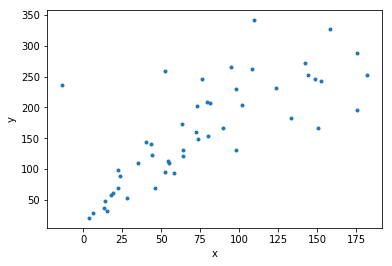

In [3]:
plt.plot(x, y, '.'), plt.xlabel('x'), plt.ylabel('y')
plt.show()

# Normalizing

In [4]:
x = (x - np.average(x)*np.ones(x.shape))/(np.max(x) - np.min(x))
y = (y - np.average(y)*np.ones(y.shape))/(np.max(y) - np.min(y))

# Hyphotesis and Cost function

The objective of the linear regression is to find a *hyphotesis function*  $\mathbf{h_\theta} = \mathbf{h_\theta (X)}$ - or the parameters of this function $\boldsymbol{\theta}$ - such as the *cost function* $J = J(\boldsymbol{\theta})$ - diference between predictions and labels - is minimized. 

One possibility for cost function is to use the *Mean Squared Error* (MSE) formula:  

$$J = \frac{1}{2M}\sum\limits_{m = 1}^{M}(h_m - y_m)^2$$  

Or in the vectorized notation (thus less computacionaly demanding):  

$$J = \frac{1}{2M}(\mathbf{h_\theta} - \mathbf{y})^T(\mathbf{h_\theta} - \mathbf{y})$$

For the hyphotesis, in the case of linear regression, the most general formula is:

$$\mathbf{h_\theta} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_Nx_N$$

If we define an matrix $\mathbf{X'}$ such as the first column (first feature) is always 1, then we can write:

$$\mathbf{h_\theta} = \sum \limits_{n = 0}^N \theta_nx'_n$$  

or in vectorized notation:

$$\mathbf{h_\theta} = \mathbf{X'\theta}$$

In [5]:
x_prime = np.hstack((np.ones((M,1)), x)); x_prime

array([[ 1.        , -0.3672609 ],
       [ 1.        , -0.35510784],
       [ 1.        , -0.3068816 ],
       [ 1.        , -0.31815503],
       [ 1.        , -0.31300946],
       [ 1.        , -0.2432803 ],
       [ 1.        , -0.29336318],
       [ 1.        , -0.28679502],
       [ 1.        , -0.27019759],
       [ 1.        , -0.15054508],
       [ 1.        , -0.26503178],
       [ 1.        , -0.08886035],
       [ 1.        , -0.27020194],
       [ 1.        , -0.11843045],
       [ 1.        , -0.20598364],
       [ 1.        , -0.10800229],
       [ 1.        , -0.05842744],
       [ 1.        , -0.10393042],
       [ 1.        ,  0.11660743],
       [ 1.        , -0.05882242],
       [ 1.        , -0.16118323],
       [ 1.        , -0.16380745],
       [ 1.        , -0.00819026],
       [ 1.        , -0.18046921],
       [ 1.        ,  0.02292708],
       [ 1.        , -0.01528357],
       [ 1.        ,  0.07380092],
       [ 1.        ,  0.02063152],
       [ 1.        ,

In [6]:
def h (x_prime):
    global theta
    return np.dot(x_prime, theta)

In [7]:
def J_h (h):
    global y
    return np.sum((h-y)**2)/(2*M); J # initial error

In [8]:
def J_theta(theta):
    global x_prime, y
    h = np.dot(x_prime, theta)
    return np.sum((h-y)**2)/(2*M);

In [9]:
J_theta(theta)

0.033547463042031433

# Gradient descent

$$\boldsymbol{\theta} = \boldsymbol{\theta} - \frac{\partial{J}}{\partial \boldsymbol{\theta}}$$

$$\frac{\partial J}{\partial \theta_n} = (h_\theta(\mathbf{x_m}) - y_m)x_{mn}$$

$$\theta_n \leftarrow \theta_j - \frac{\alpha}{M} \sum \limits _{m=1}^M(h_\theta(\mathbf{x_m}) - y_m)x_{mn}$$

$$\boldsymbol{\theta} \leftarrow \boldsymbol{\theta} - \frac{\alpha}{M}\mathbf{X' ^T(h_\theta - y)}$$

In [15]:
x_axis = np.linspace(-10, 100)
theta_0 = np.linspace(-3000,3000,100)/1000
theta_1 = np.linspace(-1500,1500,100)/1000

X, Y = np.meshgrid(theta_0, theta_1, sparse=False)

Z = np.zeros((100,100))

for i, e in enumerate(X[0]):
    for j, f in enumerate(Y[:,0]):
        Z[i,j] = J_theta(np.array([[e],[f]]))
        print(e,f,Z[i,j])

-3.0 -1.5 4.68591378373
-3.0 -1.4696969697 4.68132655861
-3.0 -1.43939393939 4.67680156515
-3.0 -1.40909090909 4.67233880334
-3.0 -1.37878787879 4.66793827319
-3.0 -1.34848484848 4.66359997469
-3.0 -1.31818181818 4.65932390785
-3.0 -1.28787878788 4.65511007266
-3.0 -1.25757575758 4.65095846913
-3.0 -1.22727272727 4.64686909725
-3.0 -1.19696969697 4.64284195702
-3.0 -1.16666666667 4.63887704845
-3.0 -1.13636363636 4.63497437154
-3.0 -1.10606060606 4.63113392628
-3.0 -1.07575757576 4.62735571268
-3.0 -1.04545454545 4.62363973073
-3.0 -1.01515151515 4.61998598043
-3.0 -0.984848484848 4.61639446179
-3.0 -0.954545454545 4.6128651748
-3.0 -0.924242424242 4.60939811947
-3.0 -0.893939393939 4.6059932958
-3.0 -0.863636363636 4.60265070378
-3.0 -0.833333333333 4.59937034341
-3.0 -0.80303030303 4.5961522147
-3.0 -0.772727272727 4.59299631764
-3.0 -0.742424242424 4.58990265224
-3.0 -0.712121212121 4.58687121849
-3.0 -0.681818181818 4.5839020164
-3.0 -0.651515151515 4.58099504596
-3.0 -0.6212121212

-2.69696969697 -0.560606060606 3.70947029776
-2.69696969697 -0.530303030303 3.70681225394
-2.69696969697 -0.5 3.70421644178
-2.69696969697 -0.469696969697 3.70168286127
-2.69696969697 -0.439393939394 3.69921151241
-2.69696969697 -0.409090909091 3.69680239521
-2.69696969697 -0.378787878788 3.69445550967
-2.69696969697 -0.348484848485 3.69217085578
-2.69696969697 -0.318181818182 3.68994843354
-2.69696969697 -0.287878787879 3.68778824296
-2.69696969697 -0.257575757576 3.68569028404
-2.69696969697 -0.227272727273 3.68365455677
-2.69696969697 -0.19696969697 3.68168106115
-2.69696969697 -0.166666666667 3.67976979719
-2.69696969697 -0.136363636364 3.67792076488
-2.69696969697 -0.106060606061 3.67613396423
-2.69696969697 -0.0757575757576 3.67440939523
-2.69696969697 -0.0454545454545 3.67274705789
-2.69696969697 -0.0151515151515 3.6711469522
-2.69696969697 0.0151515151515 3.66960907817
-2.69696969697 0.0454545454545 3.66813343579
-2.69696969697 0.0757575757576 3.66672002507
-2.69696969697 0.106

-2.45454545455 -1.22727272727 3.15926579146
-2.45454545455 -1.19696969697 3.15523865124
-2.45454545455 -1.16666666667 3.15127374267
-2.45454545455 -1.13636363636 3.14737106575
-2.45454545455 -1.10606060606 3.1435306205
-2.45454545455 -1.07575757576 3.13975240689
-2.45454545455 -1.04545454545 3.13603642494
-2.45454545455 -1.01515151515 3.13238267465
-2.45454545455 -0.984848484848 3.128791156
-2.45454545455 -0.954545454545 3.12526186902
-2.45454545455 -0.924242424242 3.12179481369
-2.45454545455 -0.893939393939 3.11838999001
-2.45454545455 -0.863636363636 3.11504739799
-2.45454545455 -0.833333333333 3.11176703762
-2.45454545455 -0.80303030303 3.10854890891
-2.45454545455 -0.772727272727 3.10539301186
-2.45454545455 -0.742424242424 3.10229934645
-2.45454545455 -0.712121212121 3.09926791271
-2.45454545455 -0.681818181818 3.09629871061
-2.45454545455 -0.651515151515 3.09339174017
-2.45454545455 -0.621212121212 3.09054700139
-2.45454545455 -0.590909090909 3.08776449426
-2.45454545455 -0.5606

-2.15151515152 -0.893939393939 2.4205020194
-2.15151515152 -0.863636363636 2.41715942738
-2.15151515152 -0.833333333333 2.41387906701
-2.15151515152 -0.80303030303 2.4106609383
-2.15151515152 -0.772727272727 2.40750504124
-2.15151515152 -0.742424242424 2.40441137584
-2.15151515152 -0.712121212121 2.40137994209
-2.15151515152 -0.681818181818 2.39841074
-2.15151515152 -0.651515151515 2.39550376956
-2.15151515152 -0.621212121212 2.39265903078
-2.15151515152 -0.590909090909 2.38987652365
-2.15151515152 -0.560606060606 2.38715624817
-2.15151515152 -0.530303030303 2.38449820436
-2.15151515152 -0.5 2.38190239219
-2.15151515152 -0.469696969697 2.37936881168
-2.15151515152 -0.439393939394 2.37689746283
-2.15151515152 -0.409090909091 2.37448834563
-2.15151515152 -0.378787878788 2.37214146008
-2.15151515152 -0.348484848485 2.36985680619
-2.15151515152 -0.318181818182 2.36763438396
-2.15151515152 -0.287878787879 2.36547419338
-2.15151515152 -0.257575757576 2.36337623445
-2.15151515152 -0.227272727

-1.9696969697 0.530303030303 1.95601696582
-1.9696969697 0.560606060606 1.95559926157
-1.9696969697 0.590909090909 1.95524378898
-1.9696969697 0.621212121212 1.95495054804
-1.9696969697 0.651515151515 1.95471953876
-1.9696969697 0.681818181818 1.95455076113
-1.9696969697 0.712121212121 1.95444421516
-1.9696969697 0.742424242424 1.95439990084
-1.9696969697 0.772727272727 1.95441781818
-1.9696969697 0.80303030303 1.95449796717
-1.9696969697 0.833333333333 1.95464034781
-1.9696969697 0.863636363636 1.95484496011
-1.9696969697 0.893939393939 1.95511180407
-1.9696969697 0.924242424242 1.95544087968
-1.9696969697 0.954545454545 1.95583218694
-1.9696969697 0.984848484848 1.95628572586
-1.9696969697 1.01515151515 1.95680149644
-1.9696969697 1.04545454545 1.95737949867
-1.9696969697 1.07575757576 1.95801973255
-1.9696969697 1.10606060606 1.95872219809
-1.9696969697 1.13636363636 1.95948689528
-1.9696969697 1.16666666667 1.96031382413
-1.9696969697 1.19696969697 1.96120298464
-1.9696969697 1.227

-1.78787878788 0.621212121212 1.6133527519
-1.78787878788 0.651515151515 1.61312174262
-1.78787878788 0.681818181818 1.61295296499
-1.78787878788 0.712121212121 1.61284641901
-1.78787878788 0.742424242424 1.6128021047
-1.78787878788 0.772727272727 1.61282002203
-1.78787878788 0.80303030303 1.61290017102
-1.78787878788 0.833333333333 1.61304255167
-1.78787878788 0.863636363636 1.61324716397
-1.78787878788 0.893939393939 1.61351400793
-1.78787878788 0.924242424242 1.61384308354
-1.78787878788 0.954545454545 1.6142343908
-1.78787878788 0.984848484848 1.61468792972
-1.78787878788 1.01515151515 1.61520370029
-1.78787878788 1.04545454545 1.61578170252
-1.78787878788 1.07575757576 1.61642193641
-1.78787878788 1.10606060606 1.61712440195
-1.78787878788 1.13636363636 1.61788909914
-1.78787878788 1.16666666667 1.61871602799
-1.78787878788 1.19696969697 1.61960518849
-1.78787878788 1.22727272727 1.62055658065
-1.78787878788 1.25757575758 1.62157020446
-1.78787878788 1.28787878788 1.62264605993
-1

-1.60606060606 -0.893939393939 1.39570863097
-1.60606060606 -0.863636363636 1.39236603895
-1.60606060606 -0.833333333333 1.38908567858
-1.60606060606 -0.80303030303 1.38586754987
-1.60606060606 -0.772727272727 1.38271165281
-1.60606060606 -0.742424242424 1.37961798741
-1.60606060606 -0.712121212121 1.37658655366
-1.60606060606 -0.681818181818 1.37361735157
-1.60606060606 -0.651515151515 1.37071038113
-1.60606060606 -0.621212121212 1.36786564235
-1.60606060606 -0.590909090909 1.36508313522
-1.60606060606 -0.560606060606 1.36236285974
-1.60606060606 -0.530303030303 1.35970481593
-1.60606060606 -0.5 1.35710900376
-1.60606060606 -0.469696969697 1.35457542325
-1.60606060606 -0.439393939394 1.3521040744
-1.60606060606 -0.409090909091 1.3496949572
-1.60606060606 -0.378787878788 1.34734807165
-1.60606060606 -0.348484848485 1.34506341776
-1.60606060606 -0.318181818182 1.34284099553
-1.60606060606 -0.287878787879 1.34068080495
-1.60606060606 -0.257575757576 1.33858284602
-1.60606060606 -0.227272

-1.36363636364 1.5 0.963416320578
-1.30303030303 -1.5 1.03485776903
-1.30303030303 -1.4696969697 1.03027054392
-1.30303030303 -1.43939393939 1.02574555045
-1.30303030303 -1.40909090909 1.02128278865
-1.30303030303 -1.37878787879 1.0168822585
-1.30303030303 -1.34848484848 1.01254396
-1.30303030303 -1.31818181818 1.00826789315
-1.30303030303 -1.28787878788 1.00405405797
-1.30303030303 -1.25757575758 0.999902454433
-1.30303030303 -1.22727272727 0.995813082554
-1.30303030303 -1.19696969697 0.991785942331
-1.30303030303 -1.16666666667 0.987821033762
-1.30303030303 -1.13636363636 0.983918356847
-1.30303030303 -1.10606060606 0.980077911588
-1.30303030303 -1.07575757576 0.976299697983
-1.30303030303 -1.04545454545 0.972583716033
-1.30303030303 -1.01515151515 0.968929965738
-1.30303030303 -0.984848484848 0.965338447097
-1.30303030303 -0.954545454545 0.961809160112
-1.30303030303 -0.924242424242 0.958342104781
-1.30303030303 -0.893939393939 0.954937281105
-1.30303030303 -0.863636363636 0.9515946

-1.12121212121 1.13636363636 0.648192129444
-1.12121212121 1.16666666667 0.649019058292
-1.12121212121 1.19696969697 0.649908218795
-1.12121212121 1.22727272727 0.650859610953
-1.12121212121 1.25757575758 0.651873234766
-1.12121212121 1.28787878788 0.652949090233
-1.12121212121 1.31818181818 0.654087177355
-1.12121212121 1.34848484848 0.655287496132
-1.12121212121 1.37878787879 0.656550046564
-1.12121212121 1.40909090909 0.657874828651
-1.12121212121 1.43939393939 0.659261842392
-1.12121212121 1.4696969697 0.660711087788
-1.12121212121 1.5 0.662222564839
-1.06060606061 -1.5 0.748356391623
-1.06060606061 -1.4696969697 0.743769166506
-1.06060606061 -1.43939393939 0.739244173044
-1.06060606061 -1.40909090909 0.734781411237
-1.06060606061 -1.37878787879 0.730380881085
-1.06060606061 -1.34848484848 0.726042582587
-1.06060606061 -1.31818181818 0.721766515744
-1.06060606061 -1.28787878788 0.717552680556
-1.06060606061 -1.25757575758 0.713401077023
-1.06060606061 -1.22727272727 0.709311705144


-0.878787878788 0.833333333333 0.400921339548
-0.878787878788 0.863636363636 0.401125951849
-0.878787878788 0.893939393939 0.401392795804
-0.878787878788 0.924242424242 0.401721871414
-0.878787878788 0.954545454545 0.402113178679
-0.878787878788 0.984848484848 0.402566717599
-0.878787878788 1.01515151515 0.403082488174
-0.878787878788 1.04545454545 0.403660490403
-0.878787878788 1.07575757576 0.404300724287
-0.878787878788 1.10606060606 0.405003189826
-0.878787878788 1.13636363636 0.405767887019
-0.878787878788 1.16666666667 0.406594815868
-0.878787878788 1.19696969697 0.407483976371
-0.878787878788 1.22727272727 0.408435368529
-0.878787878788 1.25757575758 0.409448992341
-0.878787878788 1.28787878788 0.410524847809
-0.878787878788 1.31818181818 0.411662934931
-0.878787878788 1.34848484848 0.412863253708
-0.878787878788 1.37878787879 0.41412580414
-0.878787878788 1.40909090909 0.415450586226
-0.878787878788 1.43939393939 0.416837599968
-0.878787878788 1.4696969697 0.418286845364
-0.878

-0.636363636364 0.469696969697 0.219665331903
-0.636363636364 0.5 0.219123164347
-0.636363636364 0.530303030303 0.218643228445
-0.636363636364 0.560606060606 0.218225524198
-0.636363636364 0.590909090909 0.217870051606
-0.636363636364 0.621212121212 0.217576810668
-0.636363636364 0.651515151515 0.217345801385
-0.636363636364 0.681818181818 0.217177023757
-0.636363636364 0.712121212121 0.217070477784
-0.636363636364 0.742424242424 0.217026163466
-0.636363636364 0.772727272727 0.217044080802
-0.636363636364 0.80303030303 0.217124229793
-0.636363636364 0.833333333333 0.217266610439
-0.636363636364 0.863636363636 0.21747122274
-0.636363636364 0.893939393939 0.217738066695
-0.636363636364 0.924242424242 0.218067142305
-0.636363636364 0.954545454545 0.21845844957
-0.636363636364 0.984848484848 0.21891198849
-0.636363636364 1.01515151515 0.219427759064
-0.636363636364 1.04545454545 0.220005761294
-0.636363636364 1.07575757576 0.220645995178
-0.636363636364 1.10606060606 0.221348460716
-0.6363

-0.393939393939 1.5 0.111258377511
-0.333333333333 -1.5 0.241469339282
-0.333333333333 -1.4696969697 0.236882114165
-0.333333333333 -1.43939393939 0.232357120703
-0.333333333333 -1.40909090909 0.227894358896
-0.333333333333 -1.37878787879 0.223493828743
-0.333333333333 -1.34848484848 0.219155530245
-0.333333333333 -1.31818181818 0.214879463403
-0.333333333333 -1.28787878788 0.210665628214
-0.333333333333 -1.25757575758 0.206514024681
-0.333333333333 -1.22727272727 0.202424652802
-0.333333333333 -1.19696969697 0.198397512579
-0.333333333333 -1.16666666667 0.19443260401
-0.333333333333 -1.13636363636 0.190529927095
-0.333333333333 -1.10606060606 0.186689481836
-0.333333333333 -1.07575757576 0.182911268231
-0.333333333333 -1.04545454545 0.179195286281
-0.333333333333 -1.01515151515 0.175541535986
-0.333333333333 -0.984848484848 0.171950017345
-0.333333333333 -0.954545454545 0.16842073036
-0.333333333333 -0.924242424242 0.164953675029
-0.333333333333 -0.893939393939 0.161548851353
-0.33333

-0.151515151515 0.166666666667 0.0375088302085
-0.151515151515 0.19696969697 0.0363443461041
-0.151515151515 0.227272727273 0.0352420936546
-0.151515151515 0.257575757576 0.0342020728598
-0.151515151515 0.287878787879 0.0332242837197
-0.151515151515 0.318181818182 0.0323087262345
-0.151515151515 0.348484848485 0.031455400404
-0.151515151515 0.378787878788 0.0306643062283
-0.151515151515 0.409090909091 0.0299354437074
-0.151515151515 0.439393939394 0.0292688128412
-0.151515151515 0.469696969697 0.0286644136298
-0.151515151515 0.5 0.0281222460732
-0.151515151515 0.530303030303 0.0276423101713
-0.151515151515 0.560606060606 0.0272246059243
-0.151515151515 0.590909090909 0.026869133332
-0.151515151515 0.621212121212 0.0265758923944
-0.151515151515 0.651515151515 0.0263448831117
-0.151515151515 0.681818181818 0.0261761054837
-0.151515151515 0.712121212121 0.0260695595105
-0.151515151515 0.742424242424 0.026025245192
-0.151515151515 0.772727272727 0.0260431625283
-0.151515151515 0.8030303030

0.0909090909091 0.651515151515 0.0189986939473
0.0909090909091 0.681818181818 0.0188299163193
0.0909090909091 0.712121212121 0.0187233703461
0.0909090909091 0.742424242424 0.0186790560276
0.0909090909091 0.772727272727 0.018696973364
0.0909090909091 0.80303030303 0.0187771223551
0.0909090909091 0.833333333333 0.0189195030009
0.0909090909091 0.863636363636 0.0191241153016
0.0909090909091 0.893939393939 0.019390959257
0.0909090909091 0.924242424242 0.0197200348672
0.0909090909091 0.954545454545 0.0201113421321
0.0909090909091 0.984848484848 0.0205648810519
0.0909090909091 1.01515151515 0.0210806516264
0.0909090909091 1.04545454545 0.0216586538556
0.0909090909091 1.07575757576 0.0222988877397
0.0909090909091 1.10606060606 0.0230013532785
0.0909090909091 1.13636363636 0.0237660504721
0.0909090909091 1.16666666667 0.0245929793204
0.0909090909091 1.19696969697 0.0254821398236
0.0909090909091 1.22727272727 0.0264335319815
0.0909090909091 1.25757575758 0.0274471557941
0.0909090909091 1.2878787

0.333333333333 0.5 0.0721993810594
0.333333333333 0.530303030303 0.0717194451576
0.333333333333 0.560606060606 0.0713017409105
0.333333333333 0.590909090909 0.0709462683182
0.333333333333 0.621212121212 0.0706530273807
0.333333333333 0.651515151515 0.0704220180979
0.333333333333 0.681818181818 0.0702532404699
0.333333333333 0.712121212121 0.0701466944967
0.333333333333 0.742424242424 0.0701023801782
0.333333333333 0.772727272727 0.0701202975146
0.333333333333 0.80303030303 0.0702004465057
0.333333333333 0.833333333333 0.0703428271515
0.333333333333 0.863636363636 0.0705474394522
0.333333333333 0.893939393939 0.0708142834076
0.333333333333 0.924242424242 0.0711433590178
0.333333333333 0.954545454545 0.0715346662827
0.333333333333 0.984848484848 0.0719882052025
0.333333333333 1.01515151515 0.072503975777
0.333333333333 1.04545454545 0.0730819780062
0.333333333333 1.07575757576 0.0737222118903
0.333333333333 1.10606060606 0.0744246774291
0.333333333333 1.13636363636 0.0751893746227
0.3333

0.575757575758 0.469696969697 0.182934386082
0.575757575758 0.5 0.182392218525
0.575757575758 0.530303030303 0.181912282623
0.575757575758 0.560606060606 0.181494578376
0.575757575758 0.590909090909 0.181139105784
0.575757575758 0.621212121212 0.180845864846
0.575757575758 0.651515151515 0.180614855563
0.575757575758 0.681818181818 0.180446077935
0.575757575758 0.712121212121 0.180339531962
0.575757575758 0.742424242424 0.180295217644
0.575757575758 0.772727272727 0.18031313498
0.575757575758 0.80303030303 0.180393283971
0.575757575758 0.833333333333 0.180535664617
0.575757575758 0.863636363636 0.180740276918
0.575757575758 0.893939393939 0.181007120873
0.575757575758 0.924242424242 0.181336196483
0.575757575758 0.954545454545 0.181727503748
0.575757575758 0.984848484848 0.182181042668
0.575757575758 1.01515151515 0.182696813243
0.575757575758 1.04545454545 0.183274815472
0.575757575758 1.07575757576 0.183915049356
0.575757575758 1.10606060606 0.184617514895
0.575757575758 1.1363636363

0.878787878788 0.530303030303 0.402297957554
0.878787878788 0.560606060606 0.401880253307
0.878787878788 0.590909090909 0.401524780715
0.878787878788 0.621212121212 0.401231539777
0.878787878788 0.651515151515 0.401000530495
0.878787878788 0.681818181818 0.400831752867
0.878787878788 0.712121212121 0.400725206893
0.878787878788 0.742424242424 0.400680892575
0.878787878788 0.772727272727 0.400698809911
0.878787878788 0.80303030303 0.400778958902
0.878787878788 0.833333333333 0.400921339548
0.878787878788 0.863636363636 0.401125951849
0.878787878788 0.893939393939 0.401392795804
0.878787878788 0.924242424242 0.401721871414
0.878787878788 0.954545454545 0.402113178679
0.878787878788 0.984848484848 0.402566717599
0.878787878788 1.01515151515 0.403082488174
0.878787878788 1.04545454545 0.403660490403
0.878787878788 1.07575757576 0.404300724287
0.878787878788 1.10606060606 0.405003189826
0.878787878788 1.13636363636 0.405767887019
0.878787878788 1.16666666667 0.406594815868
0.878787878788 1.

1.06060606061 0.863636363636 0.577434491794
1.06060606061 0.893939393939 0.577701335749
1.06060606061 0.924242424242 0.578030411359
1.06060606061 0.954545454545 0.578421718624
1.06060606061 0.984848484848 0.578875257544
1.06060606061 1.01515151515 0.579391028119
1.06060606061 1.04545454545 0.579969030348
1.06060606061 1.07575757576 0.580609264232
1.06060606061 1.10606060606 0.581311729771
1.06060606061 1.13636363636 0.582076426964
1.06060606061 1.16666666667 0.582903355813
1.06060606061 1.19696969697 0.583792516316
1.06060606061 1.22727272727 0.584743908474
1.06060606061 1.25757575758 0.585757532286
1.06060606061 1.28787878788 0.586833387754
1.06060606061 1.31818181818 0.587971474876
1.06060606061 1.34848484848 0.589171793653
1.06060606061 1.37878787879 0.590434344085
1.06060606061 1.40909090909 0.591759126171
1.06060606061 1.43939393939 0.593146139913
1.06060606061 1.4696969697 0.594595385309
1.06060606061 1.5 0.596106862359
1.12121212121 -1.5 0.814472094103
1.12121212121 -1.469696969

1.36363636364 0.5 0.94639589162
1.36363636364 0.530303030303 0.945915955718
1.36363636364 0.560606060606 0.945498251471
1.36363636364 0.590909090909 0.945142778878
1.36363636364 0.621212121212 0.944849537941
1.36363636364 0.651515151515 0.944618528658
1.36363636364 0.681818181818 0.94444975103
1.36363636364 0.712121212121 0.944343205057
1.36363636364 0.742424242424 0.944298890738
1.36363636364 0.772727272727 0.944316808075
1.36363636364 0.80303030303 0.944396957066
1.36363636364 0.833333333333 0.944539337712
1.36363636364 0.863636363636 0.944743950012
1.36363636364 0.893939393939 0.945010793968
1.36363636364 0.924242424242 0.945339869578
1.36363636364 0.954545454545 0.945731176843
1.36363636364 0.984848484848 0.946184715763
1.36363636364 1.01515151515 0.946700486337
1.36363636364 1.04545454545 0.947278488566
1.36363636364 1.07575757576 0.94791872245
1.36363636364 1.10606060606 0.948621187989
1.36363636364 1.13636363636 0.949385885183
1.36363636364 1.16666666667 0.950212814031
1.3636363

1.78787878788 -0.681818181818 1.68215729647
1.78787878788 -0.651515151515 1.67925032603
1.78787878788 -0.621212121212 1.67640558725
1.78787878788 -0.590909090909 1.67362308012
1.78787878788 -0.560606060606 1.67090280465
1.78787878788 -0.530303030303 1.66824476083
1.78787878788 -0.5 1.66564894867
1.78787878788 -0.469696969697 1.66311536816
1.78787878788 -0.439393939394 1.6606440193
1.78787878788 -0.409090909091 1.6582349021
1.78787878788 -0.378787878788 1.65588801656
1.78787878788 -0.348484848485 1.65360336267
1.78787878788 -0.318181818182 1.65138094043
1.78787878788 -0.287878787879 1.64922074985
1.78787878788 -0.257575757576 1.64712279092
1.78787878788 -0.227272727273 1.64508706365
1.78787878788 -0.19696969697 1.64311356804
1.78787878788 -0.166666666667 1.64120230408
1.78787878788 -0.136363636364 1.63935327177
1.78787878788 -0.106060606061 1.63756647112
1.78787878788 -0.0757575757576 1.63584190212
1.78787878788 -0.0454545454545 1.63417956478
1.78787878788 -0.0151515151515 1.63257945909

2.09090909091 -1.10606060606 2.3170843395
2.09090909091 -1.07575757576 2.3133061259
2.09090909091 -1.04545454545 2.30959014395
2.09090909091 -1.01515151515 2.30593639365
2.09090909091 -0.984848484848 2.30234487501
2.09090909091 -0.954545454545 2.29881558803
2.09090909091 -0.924242424242 2.2953485327
2.09090909091 -0.893939393939 2.29194370902
2.09090909091 -0.863636363636 2.288601117
2.09090909091 -0.833333333333 2.28532075663
2.09090909091 -0.80303030303 2.28210262792
2.09090909091 -0.772727272727 2.27894673086
2.09090909091 -0.742424242424 2.27585306546
2.09090909091 -0.712121212121 2.27282163171
2.09090909091 -0.681818181818 2.26985242962
2.09090909091 -0.651515151515 2.26694545918
2.09090909091 -0.621212121212 2.2641007204
2.09090909091 -0.590909090909 2.26131821327
2.09090909091 -0.560606060606 2.2585979378
2.09090909091 -0.530303030303 2.25593989398
2.09090909091 -0.5 2.25334408181
2.09090909091 -0.469696969697 2.25081050131
2.09090909091 -0.439393939394 2.24833915245
2.090909090

2.39393939394 -1.34848484848 3.02907288562
2.39393939394 -1.31818181818 3.02479681877
2.39393939394 -1.28787878788 3.02058298359
2.39393939394 -1.25757575758 3.01643138005
2.39393939394 -1.22727272727 3.01234200817
2.39393939394 -1.19696969697 3.00831486795
2.39393939394 -1.16666666667 3.00434995938
2.39393939394 -1.13636363636 3.00044728247
2.39393939394 -1.10606060606 2.99660683721
2.39393939394 -1.07575757576 2.9928286236
2.39393939394 -1.04545454545 2.98911264165
2.39393939394 -1.01515151515 2.98545889136
2.39393939394 -0.984848484848 2.98186737272
2.39393939394 -0.954545454545 2.97833808573
2.39393939394 -0.924242424242 2.9748710304
2.39393939394 -0.893939393939 2.97146620672
2.39393939394 -0.863636363636 2.9681236147
2.39393939394 -0.833333333333 2.96484325434
2.39393939394 -0.80303030303 2.96162512562
2.39393939394 -0.772727272727 2.95846922857
2.39393939394 -0.742424242424 2.95537556317
2.39393939394 -0.712121212121 2.95234412942
2.39393939394 -0.681818181818 2.94937492733
2.39

2.69696969697 -1.37878787879 3.80476104637
2.69696969697 -1.34848484848 3.80042274788
2.69696969697 -1.31818181818 3.79614668103
2.69696969697 -1.28787878788 3.79193284585
2.69696969697 -1.25757575758 3.78778124231
2.69696969697 -1.22727272727 3.78369187043
2.69696969697 -1.19696969697 3.77966473021
2.69696969697 -1.16666666667 3.77569982164
2.69696969697 -1.13636363636 3.77179714473
2.69696969697 -1.10606060606 3.76795669947
2.69696969697 -1.07575757576 3.76417848586
2.69696969697 -1.04545454545 3.76046250391
2.69696969697 -1.01515151515 3.75680875362
2.69696969697 -0.984848484848 3.75321723498
2.69696969697 -0.954545454545 3.74968794799
2.69696969697 -0.924242424242 3.74622089266
2.69696969697 -0.893939393939 3.74281606898
2.69696969697 -0.863636363636 3.73947347696
2.69696969697 -0.833333333333 3.7361931166
2.69696969697 -0.80303030303 3.73297498788
2.69696969697 -0.772727272727 3.72981909083
2.69696969697 -0.742424242424 3.72672542542
2.69696969697 -0.712121212121 3.72369399168
2.6

2.87878787879 -1.16666666667 4.28258687398
2.87878787879 -1.13636363636 4.27868419707
2.87878787879 -1.10606060606 4.27484375181
2.87878787879 -1.07575757576 4.2710655382
2.87878787879 -1.04545454545 4.26734955625
2.87878787879 -1.01515151515 4.26369580596
2.87878787879 -0.984848484848 4.26010428732
2.87878787879 -0.954545454545 4.25657500033
2.87878787879 -0.924242424242 4.253107945
2.87878787879 -0.893939393939 4.24970312133
2.87878787879 -0.863636363636 4.2463605293
2.87878787879 -0.833333333333 4.24308016894
2.87878787879 -0.80303030303 4.23986204023
2.87878787879 -0.772727272727 4.23670614317
2.87878787879 -0.742424242424 4.23361247777
2.87878787879 -0.712121212121 4.23058104402
2.87878787879 -0.681818181818 4.22761184193
2.87878787879 -0.651515151515 4.22470487149
2.87878787879 -0.621212121212 4.2218601327
2.87878787879 -0.590909090909 4.21907762558
2.87878787879 -0.560606060606 4.2163573501
2.87878787879 -0.530303030303 4.21369930628
2.87878787879 -0.5 4.21110349412
2.8787878787

In [11]:
def gradient_descent(X, y, alpha=3):
    try:
        M = X.size[0]
    except:
        M = X.size
        
    global theta
    
    #h = h(X)
    theta = theta - alpha*(np.dot(X.T,(h(X)-y)))/M
    return theta


iter =  0
theta = 0.0000, 0.0000
cost function = 0.0335



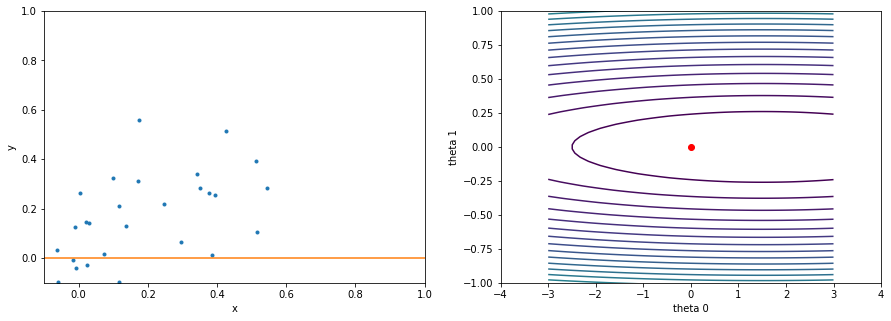

iter =  1
theta = 0.0000, 0.0761
cost function = 0.0299



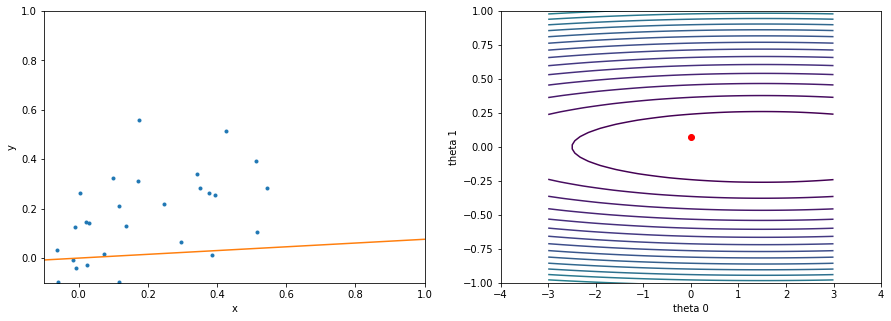

iter =  2
theta = -0.0000, 0.1445
cost function = 0.0269



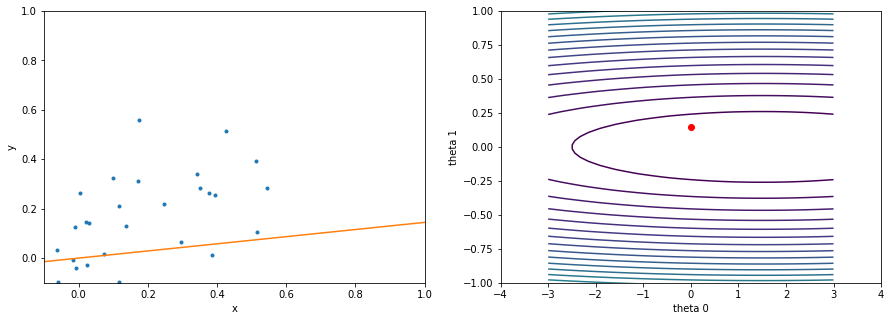

iter =  3
theta = 0.0000, 0.2059
cost function = 0.0245



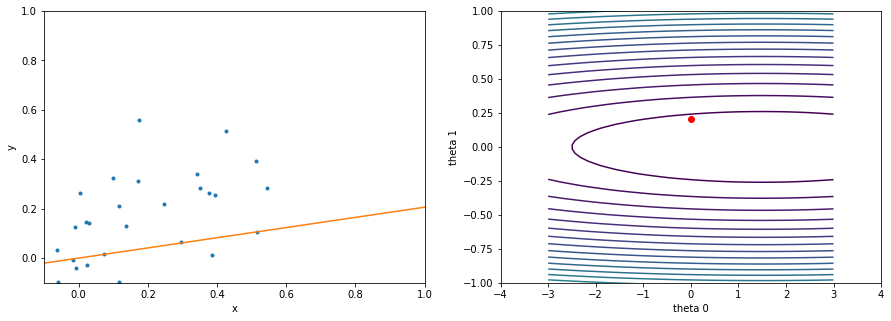

iter =  4
theta = -0.0000, 0.2611
cost function = 0.0226



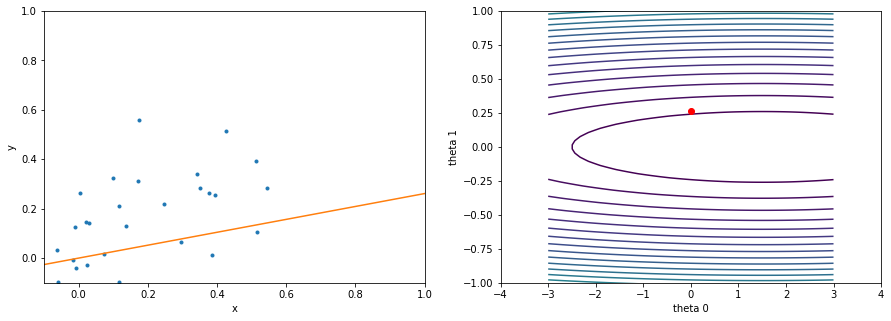

iter =  5
theta = 0.0000, 0.3107
cost function = 0.0211



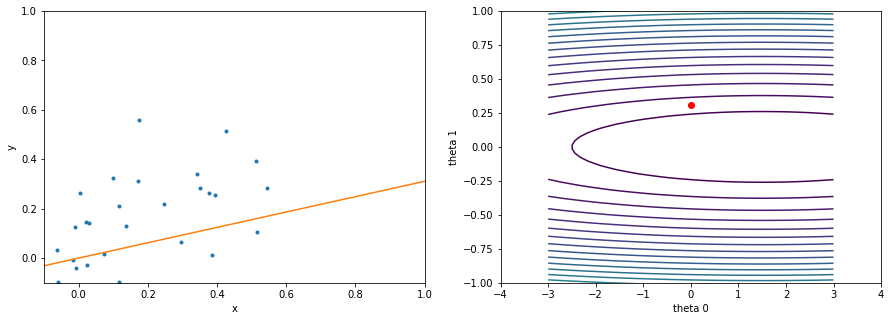

iter =  6
theta = -0.0000, 0.3553
cost function = 0.0198



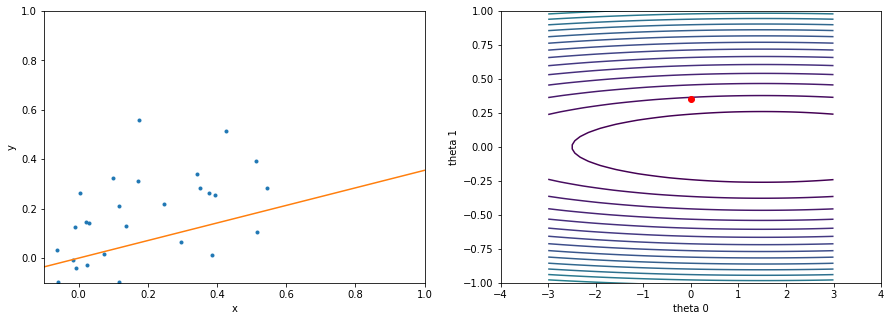

iter =  7
theta = 0.0000, 0.3953
cost function = 0.0188



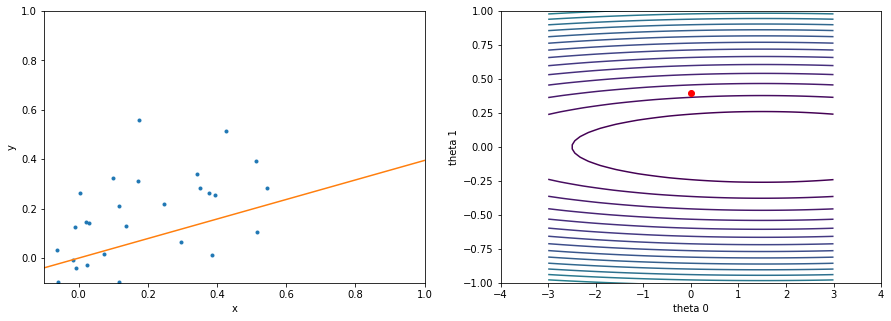

iter =  8
theta = -0.0000, 0.4312
cost function = 0.0180



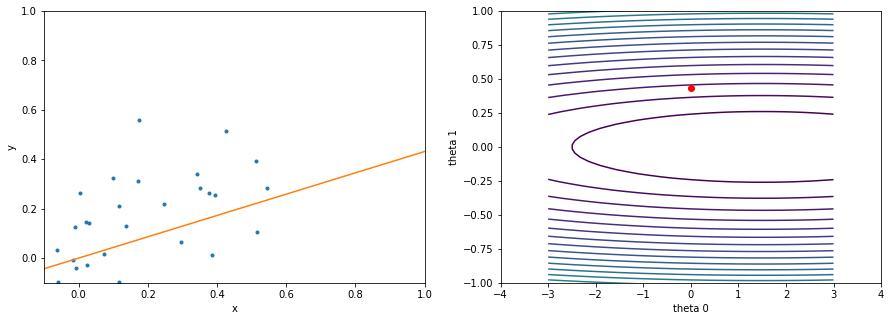

iter =  9
theta = -0.0000, 0.4635
cost function = 0.0173



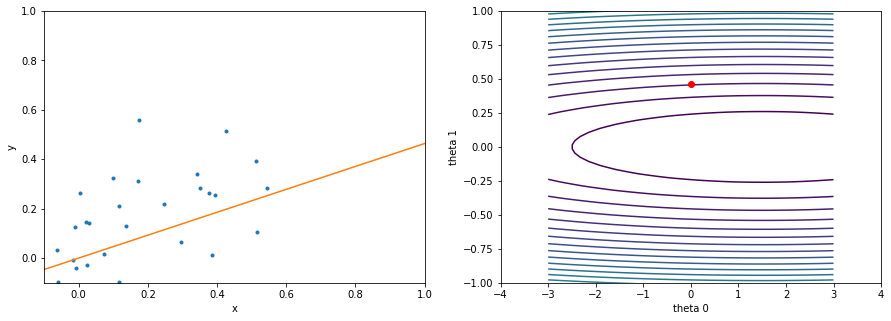

iter =  10
theta = -0.0000, 0.4925
cost function = 0.0168



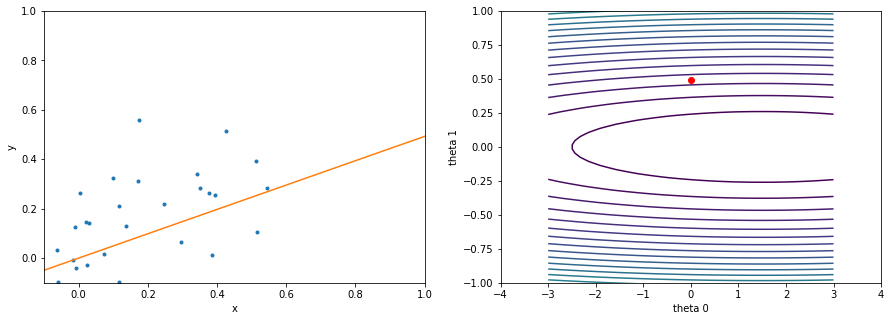

iter =  11
theta = -0.0000, 0.5186
cost function = 0.0163



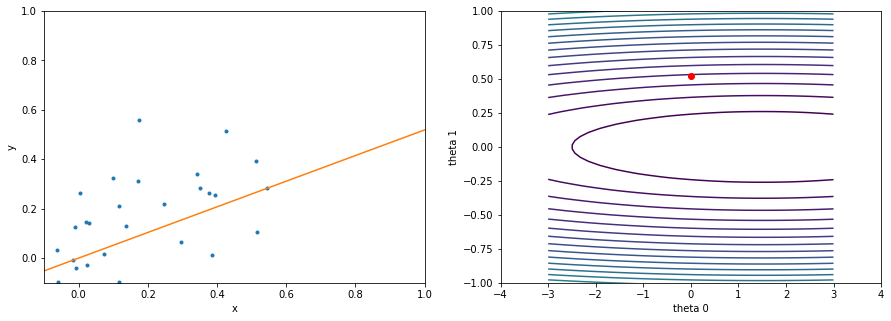

iter =  12
theta = -0.0000, 0.5420
cost function = 0.0160



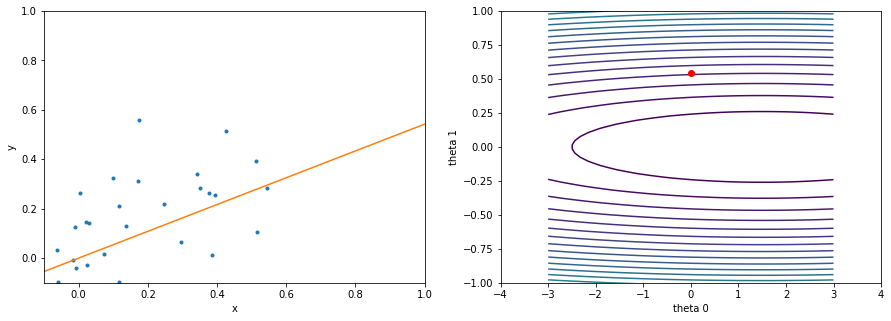

iter =  13
theta = -0.0000, 0.5630
cost function = 0.0157



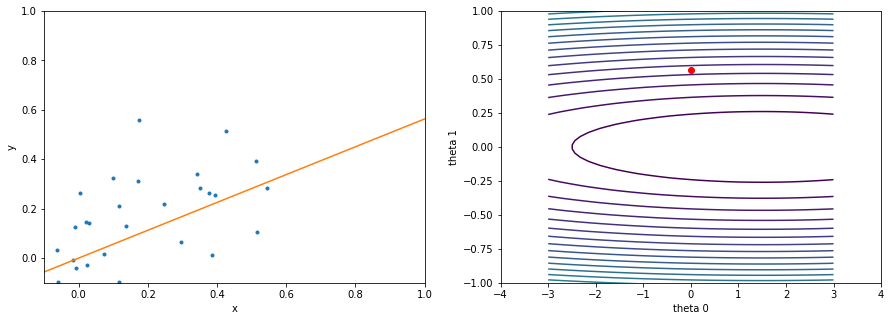

iter =  14
theta = -0.0000, 0.5819
cost function = 0.0155



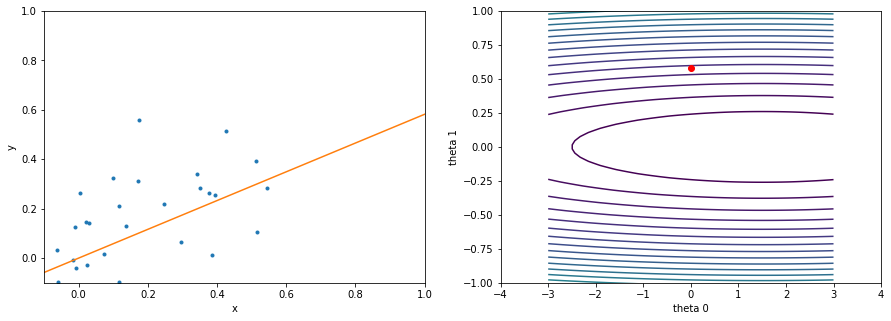

iter =  15
theta = 0.0000, 0.5989
cost function = 0.0153



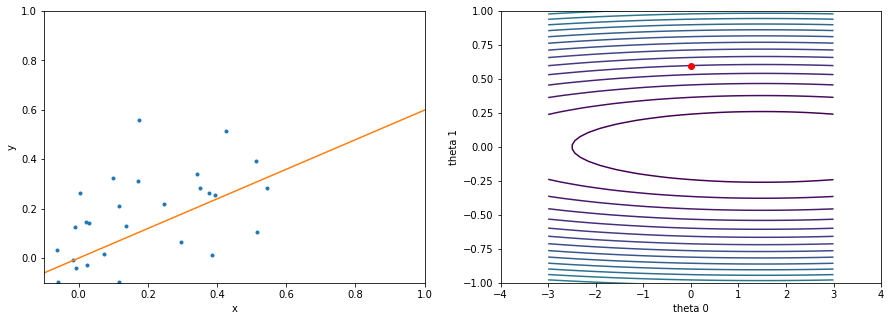

iter =  16
theta = -0.0000, 0.6141
cost function = 0.0152



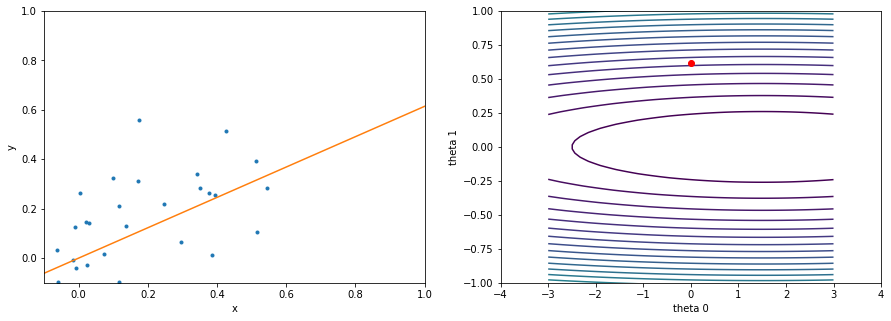

iter =  17
theta = -0.0000, 0.6278
cost function = 0.0150



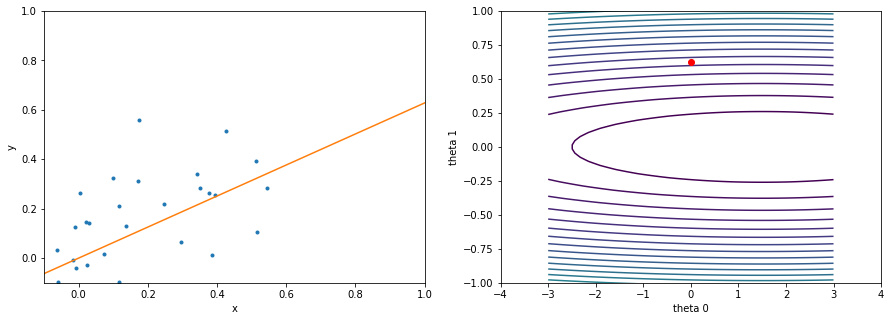

iter =  18
theta = -0.0000, 0.6401
cost function = 0.0149



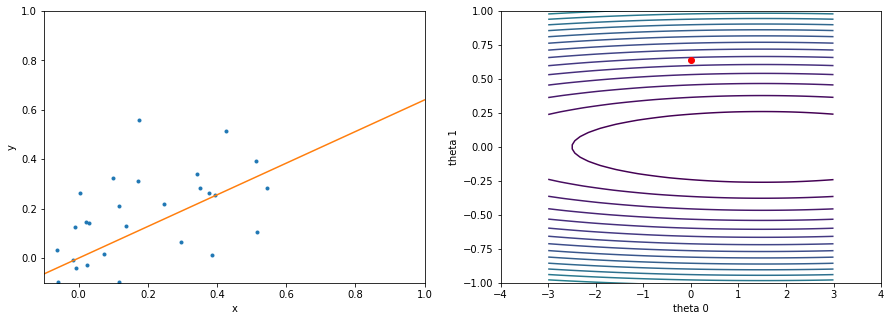

iter =  19
theta = -0.0000, 0.6512
cost function = 0.0149



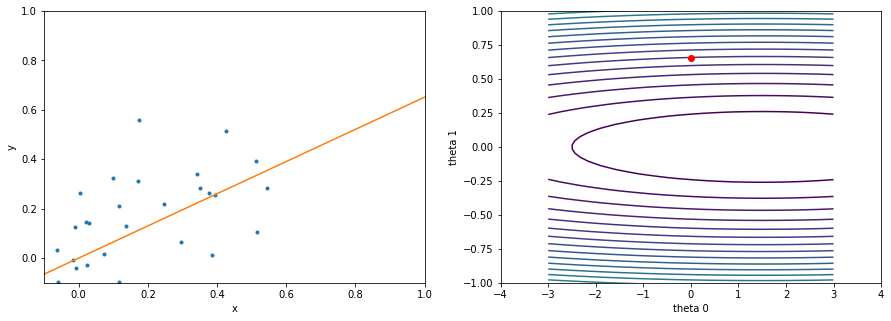

In [12]:

for i in range(20):
    
    H = h(x_prime)
    
    print("iter = ", i)
    print("theta = %.4f, %.4f" % (theta[0,0], theta[1,0]))
    print("cost function = %.4f\n" % J_h(H))
    
    fig, axis = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(15,5)
    axis[0].plot(x, y, '.'), axis[0].set_xlabel('x'), axis[0].set_ylabel('y'), axis[0].set_xlim([-0.1,1]),axis[0].set_ylim([-0.1,1])
    axis[0].plot(x_axis, theta[0] +x_axis*theta[1] )                      # regression
    
    axis[1].contour(X, Y, Z, 40), axis[1].set_xlabel('theta 0'), axis[1].set_ylabel('theta 1')
    axis[1].set_xlim([-4,4]),axis[1].set_ylim([-1,1])
    axis[1].plot(theta[0,0], theta[1,0], 'ro')
    
    plt.show()
    
    theta = gradient_descent(x_prime, y)


iter =  20
theta = -0.0000, 0.6611


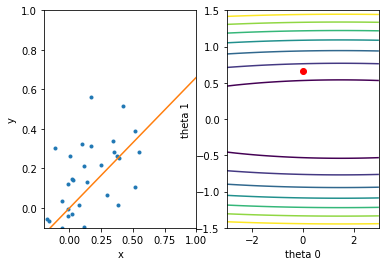

In [13]:
i += 1

print("iter = ", i)
print("theta = %.4f, %.4f" % (theta[0,0], theta[1,0]))
#print("cost function = %.4f\n" % (h))

fig, axis = plt.subplots(nrows=1, ncols=2)

axis[0].plot(x, y, '.'), axis[0].set_xlabel('x'), axis[0].set_ylabel('y') # data
axis[0].set_xlim([-0.2,1.0]),axis[0].set_ylim([-0.1,1.0])
axis[0].plot(x_axis, theta[0] +x_axis*theta[1] )                      # regression


axis[1].contour(X, Y, Z), axis[1].set_xlabel('theta 0'), axis[1].set_ylabel('theta 1')
axis[1].plot(theta[0,0], theta[1,0], 'ro')

plt.show()